
# 🌸 Iris Flower Classification



## Overview
This project builds a classification model to predict the species of an Iris flower based on sepal and petal dimensions using multiple machine learning algorithms.





### Models Used
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Random Forest Classifier


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [7]:
df = pd.read_csv('IRIS.csv')

## Overview of Data

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()   

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df.duplicated().sum()

3

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Encoding the target

In [19]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [24]:
df['species'].dtype

dtype('int32')

## Visualization

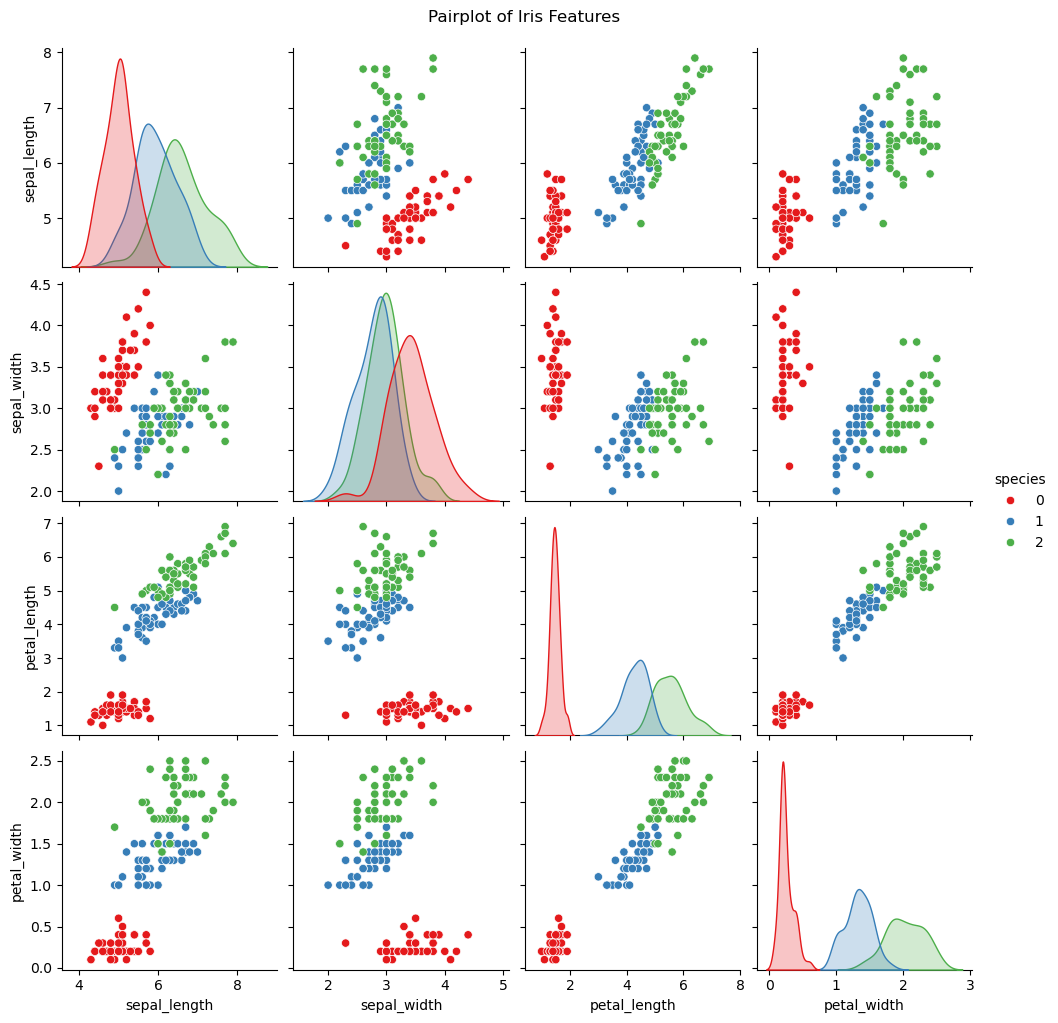

In [63]:
sns.pairplot(df, hue='species',palette='Set1')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


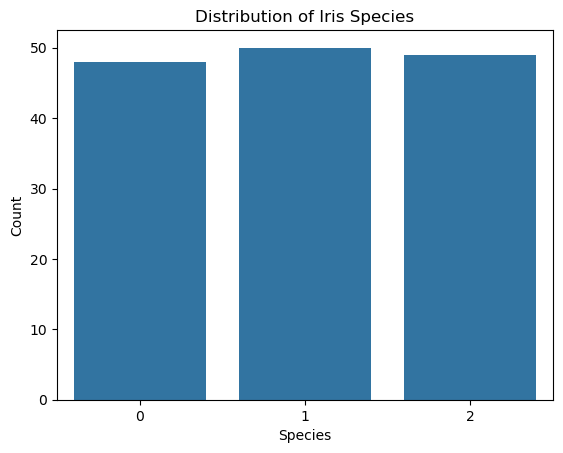

In [55]:
sns.countplot(x='species', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


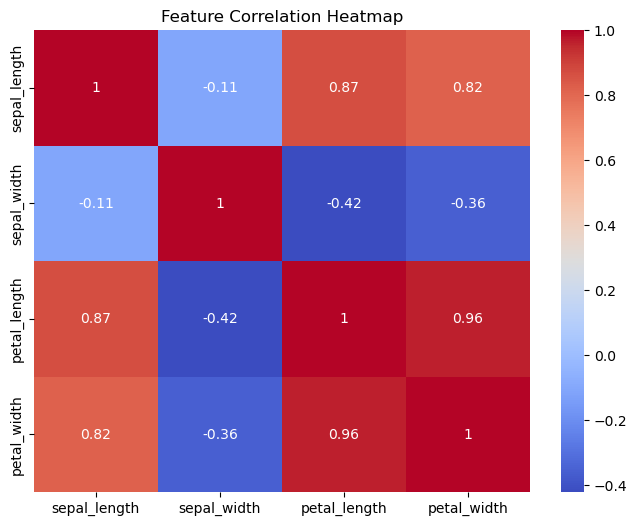

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

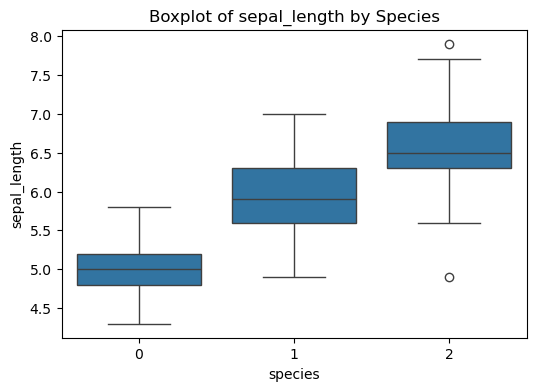

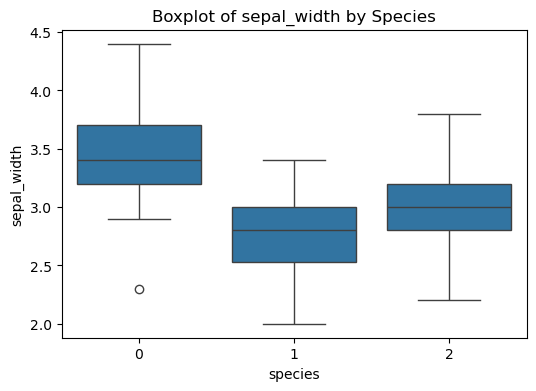

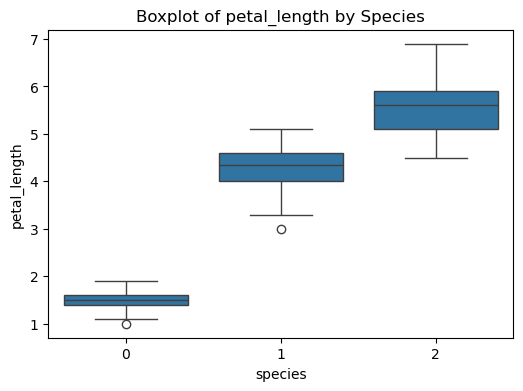

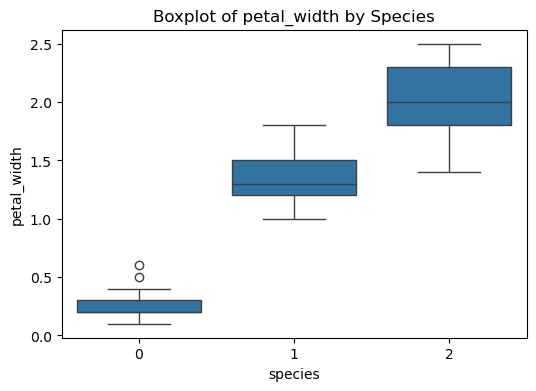

In [66]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Boxplot of {col} by Species')
    plt.show()


## Dealing With Outliers

In [68]:
mean = np.mean(df['sepal_width'])
std = np.std(df['sepal_width'])

# Step 1: Calculate the Z-Score
df['width-Z-Score'] = (df['sepal_width'] - mean) / std
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,width-Z-Score
0,5.1,3.5,1.4,0.2,0,1.019971
1,4.9,3.0,1.4,0.2,0,-0.128082
2,4.7,3.2,1.3,0.2,0,0.331139
3,4.6,3.1,1.5,0.2,0,0.101529
4,5.0,3.6,1.4,0.2,0,1.249582


In [69]:
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['width-Z-Score'] > 3]}")

Here are the outliers based on the z-score threshold, 3:
     sepal_length  sepal_width  petal_length  petal_width  species  \
15           5.7          4.4           1.5          0.4        0   

    width-Z-Score  
15       3.086468  


In [70]:
# Now we will check all the outliers in these 4 columns
data_1 = df[['sepal_length','sepal_width','petal_length','petal_width']]

data_1 = pd.DataFrame(data_1)

means = data_1.mean()
stds = data_1.std()

z_scores = (df - means) / stds

# Set a threshold for Z-score to identify outliers
threshold = 3  

# Identify rows where any column has an outlier
outliers = (z_scores.abs() > threshold).any(axis=1)

print("Rows with outliers:")
print(data_1[outliers])

Rows with outliers:
    sepal_length  sepal_width  petal_length  petal_width
15           5.7          4.4           1.5          0.4


In [71]:
df_no_outliers = data_1[~outliers]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers.head(5))


DataFrame without outliers:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [75]:
# Merging the data without outliers on the index basis
merged_df = pd.merge(df_no_outliers, df, left_index=True, right_index=True)
merged_df.head(5)

,sepal_length_x,sepal_width_x,petal_length_x,petal_width_x,sepal_length_y,sepal_width_y,petal_length_y,petal_width_y,species,width-Z-Score
0,5.1,3.5,1.4,0.2,5.1,3.5,1.4,0.2,0,1.019971
1,4.9,3.0,1.4,0.2,4.9,3.0,1.4,0.2,0,-0.128082
2,4.7,3.2,1.3,0.2,4.7,3.2,1.3,0.2,0,0.331139
3,4.6,3.1,1.5,0.2,4.6,3.1,1.5,0.2,0,0.101529
4,5.0,3.6,1.4,0.2,5.0,3.6,1.4,0.2,0,1.249582


In [78]:
merged_df = merged_df[['sepal_length_x','sepal_width_x','petal_length_x','petal_width_x','species']]

In [79]:
merged_df.columns = merged_df.columns.str.replace('_x', '')

In [80]:
# final data without Outliers 
df = merged_df.copy()
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [82]:
# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [95]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))
    print("------")


Logistic Regression Accuracy: 0.97
[[25  0  0]
 [ 0 13  2]
 [ 0  0 19]]
------
K-Nearest Neighbors Accuracy: 0.95
[[25  0  0]
 [ 0 13  2]
 [ 0  1 18]]
------
Random Forest Accuracy: 0.97
[[25  0  0]
 [ 0 13  2]
 [ 0  0 19]]
------


C:\Users\elora\AppData\Local\Temp\ipykernel_23456\1790284827.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


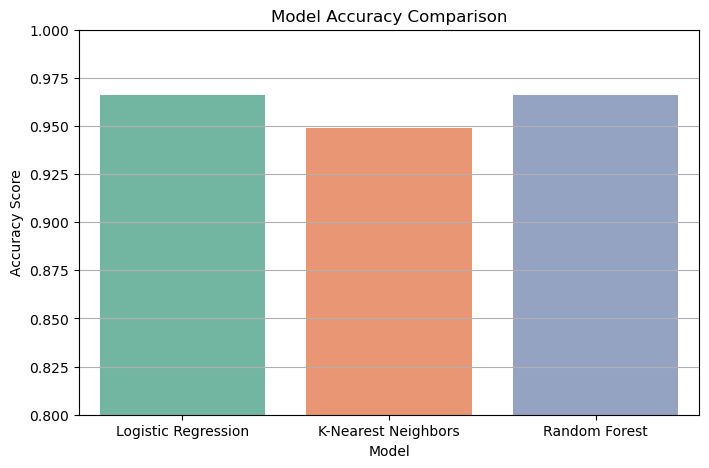

In [94]:
# Accuracy Comparison Plot
accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.grid(axis='y')
plt.show()


## Predict Iris Species from User Input

In [96]:
# Access the trained Logistic Regression model
logreg_model = models["Logistic Regression"]

print("🌸 Enter Iris flower measurements:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))

# Wrap input in a DataFrame to match training format
user_input = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=X.columns)

predicted_index = logreg_model.predict(user_input)[0]


# Map encoded label to species name
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
predicted_label = class_names[predicted_index]

# Output result
print(f"\nPredicted Iris Species: {predicted_label}")


🌸 Enter Iris flower measurements:

Predicted Iris Species: Iris-setosa
